# **Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [3]:
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import regularizers
from keras import layers
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras import backend as K
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=5)
seed = 7
np.random.seed(seed)

# **Load and Prepare Dataset**

In [4]:
train_path = '/content/drive/MyDrive/Preprocessed_Train_Images'
test_path = '/content/drive/MyDrive/Preprocessed_Test_Images/test/*'

In [5]:
img_files = os.listdir(train_path) 
img_label_arr = [[]]
img_path_arr = []
target_label_arr = []
img_arr = []
seed = 7
img_size = 64
for label in img_files:
  print(label)
  for img in os.listdir(os.path.join(train_path, label)):
    img_path = os.path.join(train_path, label, img)
    img_label_arr.append([img_path, label]) # image path, label
    img_path_arr.append(img_path) # paths to images
    target_label_arr.append(label) # labels
    img_arr.append(cv2.resize(cv2.imread(img_path), (img_size, img_size))) # images

Charlock
Cleavers
Common Chickweed
Fat Hen
Maize
Scentless Mayweed
Shepherds Purse
Black-grass
Common wheat
Loose Silky-bent
Small-flowered Cranesbill
Sugar beet


In [6]:
img_arr = np.asarray(img_arr) # Array of all images
label_df = pd.DataFrame(target_label_arr) # dataframe of all the categories matching each image

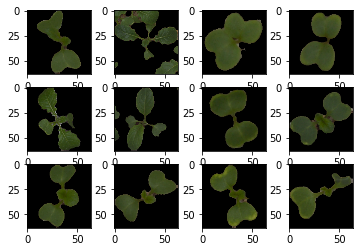

In [7]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(img_arr[i])

In [8]:
# Encode labels and create classes
label = preprocessing.LabelEncoder()
label.fit(label_df[0])
print("Classes: " + str(label.classes_))
encode_label = label.transform(label_df[0])
# Make labels categorical
categorical_label = np_utils.to_categorical(encode_label)
num_clases = categorical_label.shape[1]
print("Number of classes: " + str(num_clases))

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


In [9]:
# normalize the training data
img_arr = img_arr/255

# **Generate Model**

In [10]:
CNN_model = Sequential() 
CNN_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3))) 
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((2, 2))) 
CNN_model.add(layers.Flatten()) 
CNN_model.add(layers.Dense(64, activation='relu'))
CNN_model.add(layers.Dense(num_clases, activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

# **Train Model**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(img_arr, categorical_label, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = categorical_label)

In [20]:
t0=time.time()
model_performance = CNN_model.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_test, y_test), verbose=2,callbacks=[early_stopping])
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = CNN_model.evaluate(x_test, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
1350/1350 - 9s - loss: 0.1288 - accuracy: 0.9579 - val_loss: 0.4992 - val_accuracy: 0.8517 - 9s/epoch - 6ms/step
Epoch 2/100
1350/1350 - 8s - loss: 0.0888 - accuracy: 0.9707 - val_loss: 0.5870 - val_accuracy: 0.8600 - 8s/epoch - 6ms/step
Epoch 3/100
1350/1350 - 8s - loss: 0.0766 - accuracy: 0.9725 - val_loss: 0.5791 - val_accuracy: 0.8725 - 8s/epoch - 6ms/step
Epoch 4/100
1350/1350 - 8s - loss: 0.0843 - accuracy: 0.9712 - val_loss: 0.6235 - val_accuracy: 0.8658 - 8s/epoch - 6ms/step
Epoch 5/100
1350/1350 - 8s - loss: 0.0601 - accuracy: 0.9785 - val_loss: 0.7215 - val_accuracy: 0.8500 - 8s/epoch - 6ms/step
Epoch 6/100
1350/1350 - 8s - loss: 0.0571 - accuracy: 0.9818 - val_loss: 0.8105 - val_accuracy: 0.8558 - 8s/epoch - 6ms/step
50.367191314697266  seconds
Baseline Error: 14.42%


#**Evaluate Model**

In [21]:
print(CNN_model.evaluate(x_train, y_train)) 
print(CNN_model.evaluate(x_test, y_test)) 

338/338 [==============================] - 3s 8ms/step - loss: 0.0493 - accuracy: 0.9833
[0.04932592809200287, 0.9833333492279053]
38/38 [==============================] - 0s 8ms/step - loss: 0.8105 - accuracy: 0.8558
[0.8105440139770508, 0.8558333516120911]


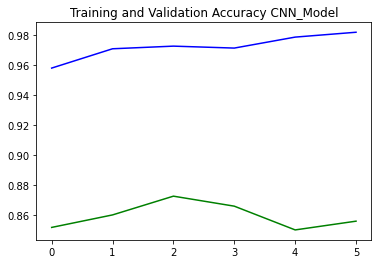

In [22]:
# plot training accuracies
plt.plot(model_performance.history['accuracy'],'b') #training accuracy
plt.plot(model_performance.history['val_accuracy'],'g') #validation accuracy
plt.title('Training and Validation Accuracy CNN_Model') 
plt.show()

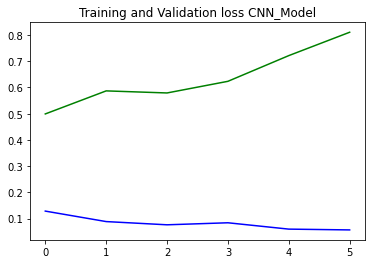

In [23]:
# plot training and validation loss
plt.plot(model_performance.history['loss'],'b') #train loss
plt.plot(model_performance.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss CNN_Model') 
plt.show()

# **Run on Test Dataset**

In [24]:
images = glob(test_path)
test_img = []
img_name = []
num = len(images)
for img in images:
    img_name.append(img.split('/')[-1])
    test_img.append(cv2.resize(cv2.imread(img),(img_size,img_size)))
test_images = np.asarray(test_img)
len(test_images)

794

In [25]:
test_images=test_images/255
prediction = CNN_model.predict(test_images)

In [26]:
#Prediction to csv file
pred = np.argmax(prediction,axis=1)
pred_label = label.classes_[pred]
result = {'file':img_name,'species':pred_label}
result = pd.DataFrame(result)
result.to_csv("Prediction.csv",index=False)
result.head(10)
files.download("Prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>